# Data load and cleaning

In [2]:
import pandas as pd

#load the data data_w_genres.csv
data_by_genres = pd.read_csv('/Users/taief/Desktop/MUSIC REC/data/data_by_genres.csv')
#print data head
print(data_by_genres.head())

   mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
3     1                      []      0.651417      0.529093  2.328809e+05   
4     1              a cappella      0.676557      0.538961  1.906285e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
3  0.419146          0.205309  0.218696 -12.288965     0.107872  112.857352   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   

    valence  popularity  key  
0  0.103783   27.833333    6  


In [3]:
# Check for missing values
print(data_by_genres.isnull().sum())

# Get a summary of the dataset
print(data_by_genres.describe())

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64
              mode  acousticness  danceability   duration_ms       energy  \
count  2973.000000   2973.000000   2973.000000  2.973000e+03  2973.000000   
mean      0.833165      0.401241      0.537187  2.517209e+05     0.561143   
std       0.372891      0.319760      0.150668  9.465686e+04     0.234486   
min       0.000000      0.000003      0.056900  3.094600e+04     0.001002   
25%       1.000000      0.119050      0.441202  2.063788e+05     0.395058   
50%       1.000000      0.321745      0.546496  2.375453e+05     0.601195   
75%       1.000000      0.673991      0.647500  2.772720e+05     0.730127   
max       1.000000      0.996000      0.929000  2.382587e+06   

In [4]:
import pandas as pd

data_by_genres = pd.read_csv('/Users/taief/Desktop/MUSIC REC/data/data_by_genres.csv')

# Replace empty lists with the string 'Unknown'
data_by_genres['genres'] = data_by_genres['genres'].apply(lambda x: 'Unknown' if x == '[]' else x)

# Check again for empty lists
empty_lists = data_by_genres['genres'].apply(lambda x: x == 'Unknown').sum()
print(f"Number of 'Unknown' genre entries: {empty_lists}")

# check for [] values in genres column
print(data_by_genres['genres'].head())

Number of 'Unknown' genre entries: 1
0    21st century classical
1                     432hz
2                     8-bit
3                   Unknown
4                a cappella
Name: genres, dtype: object


In [5]:
# save the data on a new csv file
data_by_genres.to_csv('/Users/taief/Desktop/MUSIC REC/data/data_by_genres1.csv', index=False)

In [6]:
# load the data
data_by_genres = pd.read_csv('/Users/taief/Desktop/MUSIC REC/data/data_by_genres1.csv')
# check the data head
print(data_by_genres.head())

   mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
3     1                 Unknown      0.651417      0.529093  2.328809e+05   
4     1              a cappella      0.676557      0.538961  1.906285e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
3  0.419146          0.205309  0.218696 -12.288965     0.107872  112.857352   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   

    valence  popularity  key  
0  0.103783   27.833333    6  


# Data Standardization

In [7]:
#data standardization
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Feature to scale
features_to_scale = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Apply the scaler to the features to scale
data_by_genres[features_to_scale] = scaler.fit_transform(data_by_genres[features_to_scale])

# Display the first five rows of the DataFrame
print(data_by_genres.head())


   mode                  genres  acousticness  danceability  duration_ms  \
0     1  21st century classical      1.808197     -2.484719    -0.966000   
1     1                   432hz      0.292578     -1.578931     8.423062   
2     1                   8-bit      1.128407      1.160449    -1.442757   
3     1                 Unknown      0.782518     -0.053735    -0.199068   
4     1              a cappella      0.861153      0.011776    -0.645517   

     energy  instrumentalness  liveness  loudness  speechiness     tempo  \
0 -2.089283          1.479575  1.828029 -3.912689    -0.534628 -2.500950   
1 -0.471170          0.996674 -0.669260 -1.181781    -0.084146  0.072537   
2  1.095589          2.486616 -0.723408  0.247722    -0.454680  0.825894   
3 -0.605666         -0.022662  0.280445 -0.331412     0.301775 -0.352759   
4 -1.043772         -0.779555 -0.222497 -0.366883    -0.009152 -0.395526   

    valence  popularity  key  
0 -1.927609   27.833333    6  
1 -1.342996   52.500000 

Visualize the Scaled Features

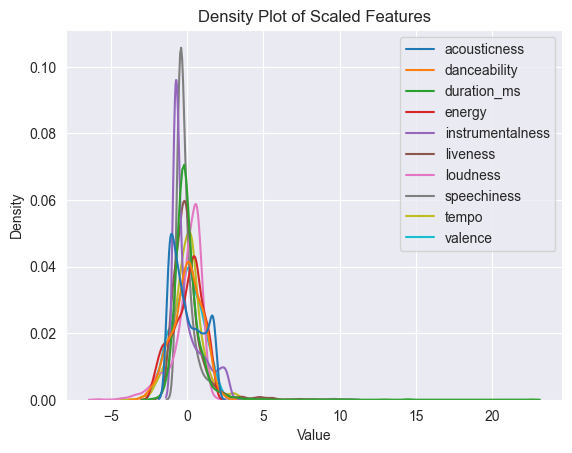

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the scaled features
sns.kdeplot(data=data_by_genres[features_to_scale])
plt.title('Density Plot of Scaled Features')
plt.xlabel('Value')
plt.ylabel('Density')
# save the plot
plt.savefig('/Users/taief/Desktop/MUSIC REC/data/scaled_features_genre.png')
plt.show()


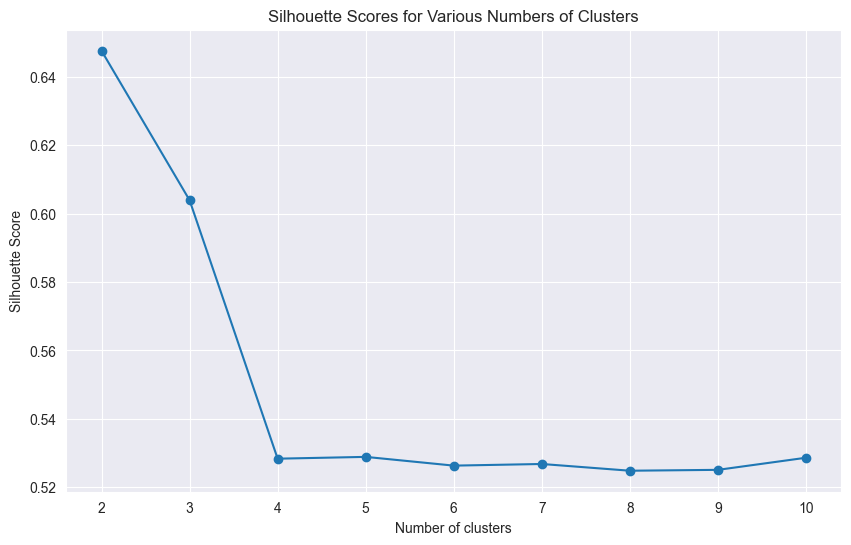

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data_by_genres = pd.read_csv('/Users/taief/Desktop/MUSIC REC/data/data_by_genres1.csv')

features_to_scale = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Range of k values to try
k_range = range(2, 11)

silhouette_scores = []  # To store the silhouette scores for each k

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_by_genres[features_to_scale])
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_by_genres[features_to_scale], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.show()


In [20]:
kmeans = KMeans(n_clusters=5, random_state=42)
data_by_genres['cluster'] = kmeans.fit_predict(data_by_genres[features_to_scale])

# Check the size of each cluster
print(data_by_genres['cluster'].value_counts())


cluster
4    1436
0     849
1     584
3      99
2       5
Name: count, dtype: int64


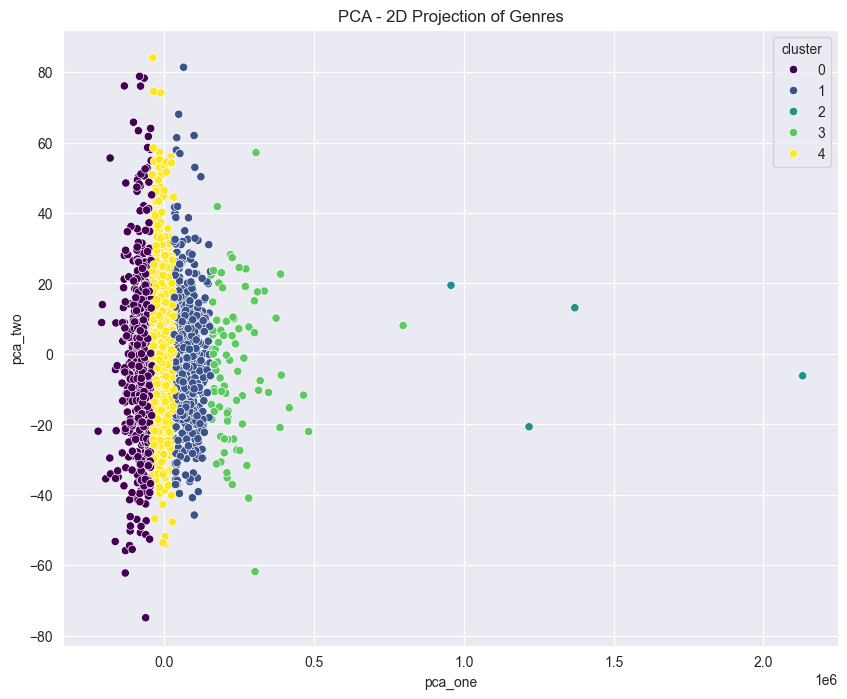

In [21]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_by_genres[features_to_scale])

# Add the PCA results to the DataFrame
data_by_genres['pca_one'] = pca_result[:, 0]
data_by_genres['pca_two'] = pca_result[:, 1]

# Visualize the PCA result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_one', y='pca_two', hue='cluster', data=data_by_genres, palette='viridis')
plt.title('PCA - 2D Projection of Genres')
plt.show()


   acousticness  danceability  duration_ms    energy  instrumentalness  \
0      0.856250     -0.023299    -0.315346 -0.698424         -0.202465   
1     -0.863871     -0.381411    -0.092104  0.925133         -0.388255   
2     -0.463945      0.934094    -0.143530  0.421868         -0.571709   
3     -0.785045     -0.177315     0.765161  0.567534          1.436621   
4      0.965165      0.484620     1.052593 -0.742992         -0.705239   
5      1.453105     -1.373166     0.501013 -1.622688          1.446450   

   liveness  loudness  speechiness     tempo   valence  
0  0.031261 -0.280528    -0.227663 -0.301060  0.147222  
1  0.281514  0.729778    -0.037359  0.796095 -0.240556  
2 -0.220814  0.493697     0.247208 -0.017237  0.809569  
3  0.271438  0.189027    -0.244114  0.170502 -0.646641  
4  2.043462 -1.106626     8.079643 -1.045838 -0.124443  
5 -0.341295 -1.954148    -0.396504 -0.833714 -1.292056  


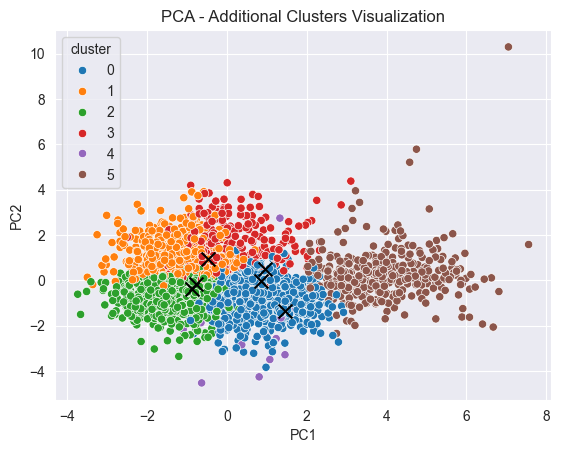

In [25]:
import matplotlib.pyplot as plt

additional_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Standardize the new set of features
additional_scaled_features = scaler.fit_transform(data_by_genres[additional_features])

# Apply K-Means clustering with the new features
additional_kmeans = KMeans(n_clusters=6, random_state=42)  
additional_clusters = additional_kmeans.fit_predict(additional_scaled_features)
data_by_genres['additional_cluster_label'] = additional_clusters

# Examine the centroids of the clusters
centroids = additional_kmeans.cluster_centers_

# Convert to a DataFrame for  interpretation
centroids_df = pd.DataFrame(centroids, columns=additional_features)

# Display the centroids to understand what each cluster represents
print(centroids_df)

# Project the new clustering results onto the PCA-reduced space
pca_result = PCA(n_components=2).fit_transform(additional_scaled_features)

# Create a new DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = additional_clusters

# Plot the PCA results with the new cluster assignments
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='tab10')
#plot title
plt.title('PCA - Additional Clusters Visualization')

#plotting the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100)

plt.savefig('/Users/taief/Desktop/MUSIC REC/plot/pca_additional_clusters_visualization_genre.png', dpi=300)

# Display the plot
plt.show()


In [27]:
# Define cluster labels based on the characteristics of the centroids

def assign_cluster_label(row):
    # Check the cluster of the row
    if row['instrumentalness'] > 0.5:
        return 'Instrumental'
    elif row['danceability'] > 0.5 and row['energy'] > 0.5:
        return 'Energetic Dance'
    elif row['valence'] > 0.5:
        return 'Positive Mood'
    elif row['speechiness'] > 0.5:
        return 'Speechy'
    elif row['acousticness'] > 0.5:
        return 'Acoustic'
    else:
        return 'Other'

# Map of cluster number to descriptive names
cluster_names = {
    0: 'Instrumental & Calm',
    1: 'Energetic & Popular',
    2: 'Mellow & Acoustic',
    3: 'Lyrical & Speech-Driven',
    4: 'Soft & Quiet',
    5: 'Upbeat & Danceable'
}

# Apply the mapping to your DataFrame
data_by_genres['cluster_name'] = data_by_genres['additional_cluster_label'].map(cluster_names)

# Verify the mapping
print(data_by_genres[['genres', 'cluster', 'cluster_name']].head(20))

                    genres  cluster             cluster_name
0   21st century classical        0       Upbeat & Danceable
1                    432hz        3  Lyrical & Speech-Driven
2                    8-bit        0        Mellow & Acoustic
3                  Unknown        4      Instrumental & Calm
4               a cappella        0      Instrumental & Calm
5                 abstract        1  Lyrical & Speech-Driven
6           abstract beats        4        Mellow & Acoustic
7         abstract hip hop        4        Mellow & Acoustic
8                accordeon        0      Instrumental & Calm
9                accordion        0      Instrumental & Calm
10              acid house        1  Lyrical & Speech-Driven
11               acid rock        4      Energetic & Popular
12             acid trance        4        Mellow & Acoustic
13              acousmatic        0       Upbeat & Danceable
14          acoustic blues        0      Instrumental & Calm
15            acoustic p

In [28]:
#save the new csv
data_by_genres.to_csv('/Users/taief/Desktop/MUSIC REC/data/enchanced_data_by_genres.csv', index=False)

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

features_to_scale = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X = data_by_genres[features_to_scale]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Apply DBSCAN to the standardized features
db = DBSCAN(eps=0.5, min_samples=5)
data_by_genres['dbscan_cluster'] = db.fit_predict(X_scaled)

# Visualize the DBSCAN clustering result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_one', y='pca_two', hue='dbscan_cluster', data=data_by_genres, palette='viridis')
plt.title('DBSCAN - Clustering of Genres')
plt.show()


from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model to the standardized features
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_clusters = gmm.fit_predict(X_scaled)
data_by_genres['gmm_cluster'] = gmm_clusters

# Visualize the GMM clustering result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_one', y='pca_two', hue='gmm_cluster', data=data_by_genres, palette='viridis')
plt.title('GMM - Clustering of Genres')
plt.show()
